### Importing Necessary Libraries

In [44]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
import matplotlib.pyplot as plt

### Load Preprocessed Data

In [45]:
data = pd.read_csv('dataset/preprocessed_data.csv', parse_dates=['timestamp'], index_col='timestamp')

In [46]:
data.shape

(8728, 24)

### Split data into Training and Testing

In [47]:
def train_test_data(data,parameter):

    data.dropna()
    
    train_data = data.iloc[:7000, : ]
    test_data = data.iloc[7000:, : ]

    X_train = train_data.drop(parameter, axis= 1)
    y_train = train_data[parameter].copy()
    X_test = test_data.drop(parameter, axis= 1)
    y_test = test_data[parameter].copy()

    return X_train, y_train, X_test, y_test, parameter

# Machine Learning Models

### Linear Regression

In [48]:
def linear_regression(X_train, y_train, X_test, y_test, parameter):

    # Set up the parameter grid for Ridge regression
    params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

    # Perform a grid search over the parameter grid
    model = GridSearchCV(Ridge(), param_grid=params, cv=5, scoring='neg_mean_squared_error')
    model.fit(X_train, y_train)

    # Print the best parameters and the corresponding RMSE
    print("Best parameters: ", model.best_params_)

    # Predict the temperature for the training and testing sets using the best model
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate evaluation metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    # Print evaluation metrics in a table format
    results = pd.DataFrame({'Metric': ['RMSE', 'R^2', 'MSE', 'MAE'],
                            'Training': [train_rmse, train_r2, train_mse, train_mae],
                            'Testing': [test_rmse, test_r2, test_mse, test_mae]})

    print(results)

    # Plot the real versus predicted values for target variables
    
    graph= plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Real {}'.format(parameter.capitalize()))
    plt.plot(y_test_pred, label='Predicted {}'.format(parameter.capitalize()))
    plt.title('Linear Regression')
    plt.xlabel('Time')
    plt.ylabel(parameter.capitalize())
    plt.legend()
    graph.savefig(f"./Graphs/results/{parameter}_linear_regression.pdf", bbox_inches='tight')
    plt.show()

    return(train_rmse, train_r2, train_mse, train_mae, test_rmse, test_r2, test_mse, test_mae )

### Decision Tree

In [49]:
def decision_tree(X_train, y_train, X_test, y_test, parameter):

    # Set up the parameter grid for Decision Tree regression
    params = {'max_depth': [2, 3, 4, 5, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2', None]}

    # Perform a grid search over the parameter grid
    model = GridSearchCV(DecisionTreeRegressor(), param_grid=params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
    model.fit(X_train, y_train)

    # Print the best parameters and the corresponding RMSE
    print("Best parameters: ", model.best_params_)

    # Predict the temperature for the training and testing sets using the best model
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate evaluation metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    # Print evaluation metrics in a table format
    results = pd.DataFrame({'Metric': ['RMSE', 'R^2', 'MSE', 'MAE'],
                            'Training': [train_rmse, train_r2, train_mse, train_mae],
                            'Testing': [test_rmse, test_r2, test_mse, test_mae]})
    
    print(results)

    # Plot the real versus predicted values for target variables
    
    graph= plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Real {}'.format(parameter.capitalize()))
    plt.plot(y_test_pred, label='Predicted {}'.format(parameter.capitalize()))
    plt.title('Decision Tree')
    plt.xlabel('Time')
    plt.ylabel(parameter.capitalize())
    plt.legend()
    graph.savefig(f"./Graphs/results/{parameter}_decision_tree.pdf", bbox_inches='tight')
    plt.show()

    return(train_rmse, train_r2, train_mse, train_mae, test_rmse, test_r2, test_mse, test_mae )

### Random Forest

In [50]:
def random_forest(X_train, y_train, X_test, y_test, parameter):

    # Set up the parameter grid for Random Forest regression
    params = {'n_estimators': [100, 500, 1000],
            'max_depth': [2, 3, 4, 5, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
            }

    # Perform a grid search over the parameter grid
    model = GridSearchCV(RandomForestRegressor(), param_grid=params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
    model.fit(X_train, y_train)


    # Print the best parameters and the corresponding RMSE
    print("Best parameters: ", model.best_params_)

    # Predict the temperature for the training and testing sets using the best model
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate evaluation metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    # Print evaluation metrics in a table format
    results = pd.DataFrame({'Metric': ['RMSE', 'R^2', 'MSE', 'MAE'],
                            'Training': [train_rmse, train_r2, train_mse, train_mae],
                            'Testing': [test_rmse, test_r2, test_mse, test_mae]})
    
    print(results)

    # Plot the real versus predicted values for target variables
    
    graph= plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Real {}'.format(parameter.capitalize()))
    plt.plot(y_test_pred, label='Predicted {}'.format(parameter.capitalize()))
    plt.title('Random Forest')
    plt.xlabel('Time')
    plt.ylabel(parameter.capitalize())
    plt.legend()
    graph.savefig(f"./Graphs/results/{parameter}_random_forest.pdf", bbox_inches='tight')
    plt.show()

    return(train_rmse, train_r2, train_mse, train_mae, test_rmse, test_r2, test_mse, test_mae )

### XGBoost

In [51]:
def xg_boost(X_train, y_train, X_test, y_test, parameter):

    # Set up the parameter grid for XGBoost regression
    params = {'max_depth': [2, 3, 4, 5],
            'learning_rate': [0.001, 0.01, 0.1],
            'n_estimators': [100, 500, 1000],
            'reg_alpha': [0, 0.1, 1]
            }

    # Perform a grid search over the parameter grid
    model = GridSearchCV(XGBRegressor(), param_grid=params, cv=5)
    model.fit(X_train, y_train)


    # Print the best parameters and the corresponding RMSE
    print("Best parameters: ", model.best_params_)

    # Predict the temperature for the training and testing sets using the best model
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate evaluation metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    # Print evaluation metrics in a table format
    results = pd.DataFrame({'Metric': ['RMSE', 'R^2', 'MSE', 'MAE'],
                            'Training': [train_rmse, train_r2, train_mse, train_mae],
                            'Testing': [test_rmse, test_r2, test_mse, test_mae]})
    
    print(results)

    # Plot the real versus predicted values for target variables
    
    graph= plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Real {}'.format(parameter.capitalize()))
    plt.plot(y_test_pred, label='Predicted {}'.format(parameter.capitalize()))
    plt.title('XGBoost')
    plt.xlabel('Time')
    plt.ylabel(parameter.capitalize())
    plt.legend()
    graph.savefig(f"./Graphs/results/{parameter}_xg_boost.pdf", bbox_inches='tight')
    plt.show()

    return(train_rmse, train_r2, train_mse, train_mae, test_rmse, test_r2, test_mse, test_mae )

### Support Vectore Regression (SVR)

In [58]:
def svr_model(X_train, y_train, X_test, y_test, parameter):

    # Define the hyperparameters to search
    params = {'C': [0.01, 0.1, 1, 10],
          'kernel': ['linear', 'rbf', 'poly'],
          'epsilon': [0.01, 0.1, 1, 10]
        
            }

    # Create an SVR model
    model = SVR()

    # Perform grid search to find the best hyperparameters
    grid = GridSearchCV(estimator=model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid.fit(X_train, y_train)

    # Print the best hyperparameters and the corresponding score
    print("Best hyperparameters: ", grid.best_params_)


    # Use the best hyperparameters to fit the model on the training data
    best_model = grid.best_estimator_
    best_model.fit(X_train, y_train)

    # Predict the temperature for the training and testing sets using the best model
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    # Calculate evaluation metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    # Print evaluation metrics in a table format
    results = pd.DataFrame({'Metric': ['RMSE', 'R^2', 'MSE', 'MAE'],
                            'Training': [train_rmse, train_r2, train_mse, train_mae],
                            'Testing': [test_rmse, test_r2, test_mse, test_mae]})
    
    print(results)

    # Plot the real versus predicted values for target variables

    graph= plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Real {}'.format(parameter.capitalize()))
    plt.plot(y_test_pred, label='Predicted {}'.format(parameter.capitalize()))
    plt.title('Support Vector Regression')
    plt.xlabel('Time')
    plt.ylabel(parameter.capitalize())
    graph.savefig(f"./Graphs/results/{parameter}_svr.pdf", bbox_inches='tight')
    plt.legend()
    plt.show()

    return(train_rmse, train_r2, train_mse, train_mae, test_rmse, test_r2, test_mse, test_mae)

### KNN Regression

In [62]:
def knn_model(X_train, y_train, X_test, y_test, parameter):

    # Define the hyperparameters to search
    params = {'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'p':[1,2]}


    # Perform a grid search over the parameter grid
    model = GridSearchCV(KNeighborsRegressor(), param_grid=params, cv=5, scoring='neg_mean_squared_error')
    model.fit(X_train, y_train)


    # Print the best parameters and the corresponding RMSE
    print("Best parameters: ", model.best_params_)

    # Predict the temperature for the training and testing sets using the best model
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate evaluation metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    # Print evaluation metrics in a table format
    results = pd.DataFrame({'Metric': ['RMSE', 'R^2', 'MSE', 'MAE'],
                            'Training': [train_rmse, train_r2, train_mse, train_mae],
                            'Testing': [test_rmse, test_r2, test_mse, test_mae]})
    
    print(results)

    # Plot the real versus predicted values for target variables
    
    graph= plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Real {}'.format(parameter.capitalize()))
    plt.plot(y_test_pred, label='Predicted {}'.format(parameter.capitalize()))
    plt.title('KNN Regression')
    plt.xlabel('Time')
    plt.ylabel(parameter.capitalize())
    plt.legend()
    graph.savefig(f"./Graphs/results/{parameter}_knn_model.pdf", bbox_inches='tight')
    plt.show()

    return(train_rmse, train_r2, train_mse, train_mae, test_rmse, test_r2, test_mse, test_mae )

# Deep Learning Models

### Long Short-Term Memory (LSTM)

In [54]:
def lstm_model(X_train, y_train, X_test, y_test, parameter):
    
    # Normalize the data
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1,1))
    X_test_scaled = scaler.fit_transform(X_test)
    y_test_scaled = scaler.fit_transform(y_test.values.reshape(-1,1))
    
    # Reshape the data for LSTM
    X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
    X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])
    
    # Define the LSTM model
    model = Sequential()
    model.add(LSTM(100, input_shape=(1, X_train.shape[1]), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    # Fit the model
    model.fit(X_train_reshaped, y_train_scaled, epochs=100, batch_size=32, verbose=1)
    
    # Make predictions
    y_train_pred = model.predict(X_train_reshaped)
    y_train_pred = scaler.inverse_transform(y_train_pred)
    y_test_pred = model.predict(X_test_reshaped)
    y_test_pred = scaler.inverse_transform(y_test_pred)

    # Calculate evaluation metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    # Print evaluation metrics in a table format
    results = pd.DataFrame({'Metric': ['RMSE', 'R^2', 'MSE', 'MAE'],
                            'Training': [train_rmse, train_r2, train_mse, train_mae],
                            'Testing': [test_rmse, test_r2, test_mse, test_mae]})
    
    print(results)

    # Plot the real versus predicted values for target variables
    graph= plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Real {}'.format(parameter.capitalize()))
    plt.plot(y_test_pred, label='Predicted {}'.format(parameter.capitalize()))
    plt.title('LSTM Regression')
    plt.xlabel('Time')
    plt.ylabel(parameter.capitalize())
    plt.legend()
    graph.savefig(f"./Graphs/results/{parameter}_lstm_model.pdf", bbox_inches='tight')
    plt.show()

    return(train_rmse, train_r2, train_mse, train_mae, test_rmse, test_r2, test_mse, test_mae )


### Multi-Layer Perceptron

In [55]:
def mlp_model(X_train, y_train, X_test, y_test, parameter):
    
    # Normalize the data
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1,1))
    X_test_scaled = scaler.fit_transform(X_test)
    y_test_scaled = scaler.fit_transform(y_test.values.reshape(-1,1))
    
    # Define the MLP model
    model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', 
                         batch_size=32, max_iter=100, verbose=1, early_stopping=True)
    
    # Fit the model
    model.fit(X_train_scaled, y_train_scaled.ravel())
    
    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_train_pred = scaler.inverse_transform(y_train_pred.reshape(-1, 1))
    y_test_pred = model.predict(X_test_scaled)
    y_test_pred = scaler.inverse_transform(y_test_pred.reshape(-1, 1))

    # Calculate evaluation metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    # Print evaluation metrics in a table format
    results = pd.DataFrame({'Metric': ['RMSE', 'R^2', 'MSE', 'MAE'],
                            'Training': [train_rmse, train_r2, train_mse, train_mae],
                            'Testing': [test_rmse, test_r2, test_mse, test_mae]})
    
    print(results)

    # Plot the real versus predicted values for target variables
    graph= plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Real {}'.format(parameter.capitalize()))
    plt.plot(y_test_pred, label='Predicted {}'.format(parameter.capitalize()))
    plt.title('MLP Regression')
    plt.xlabel('Time')
    plt.ylabel(parameter.capitalize())
    plt.legend()
    graph.savefig(f"./Graphs/results/{parameter}_mlp_model.pdf", bbox_inches='tight')
    plt.show()

    return(train_rmse, train_r2, train_mse, train_mae, test_rmse, test_r2, test_mse, test_mae )


# Execution

Best parameters:  {'alpha': 0.001}
  Metric  Training   Testing
0   RMSE  0.013576  0.029920
1    R^2  0.993232  0.965411
2    MSE  0.000184  0.000895
3    MAE  0.007654  0.021705


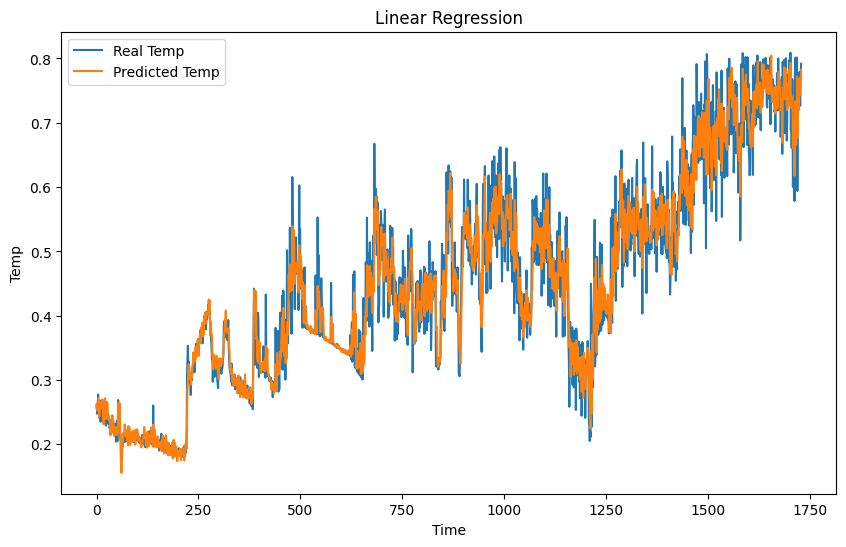

Fitting 5 folds for each of 135 candidates, totalling 675 fits
Best parameters:  {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
  Metric  Training   Testing
0   RMSE  0.003710  0.054837
1    R^2  0.999494  0.883808
2    MSE  0.000014  0.003007
3    MAE  0.001741  0.039834


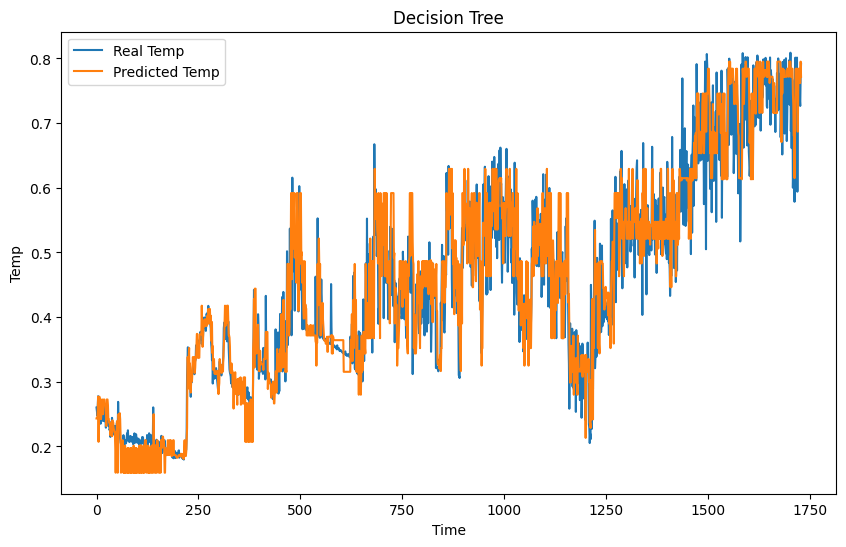

Fitting 5 folds for each of 135 candidates, totalling 675 fits
Best parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1000}
  Metric  Training   Testing
0   RMSE  0.008151  0.042931
1    R^2  0.997560  0.928787
2    MSE  0.000066  0.001843
3    MAE  0.004500  0.030188


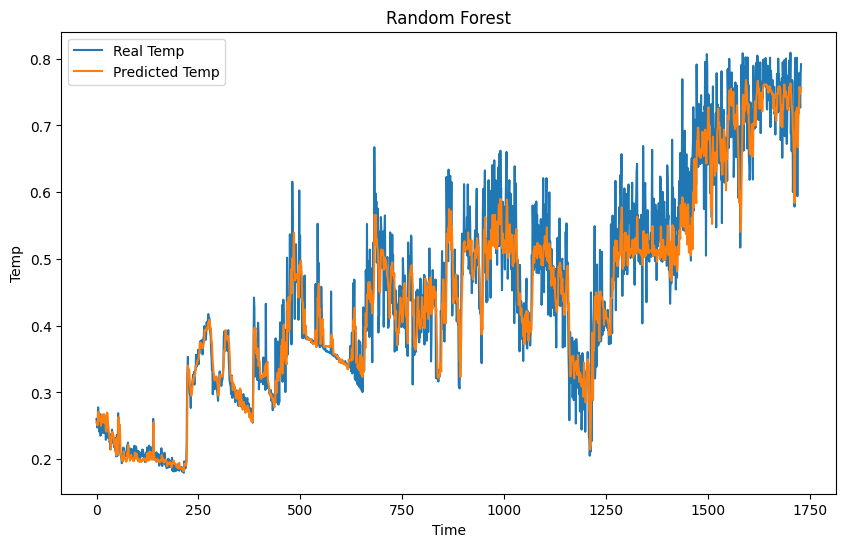

Best parameters:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'reg_alpha': 0.1}
  Metric  Training   Testing
0   RMSE  0.015161  0.043156
1    R^2  0.991559  0.928037
2    MSE  0.000230  0.001862
3    MAE  0.009538  0.030177


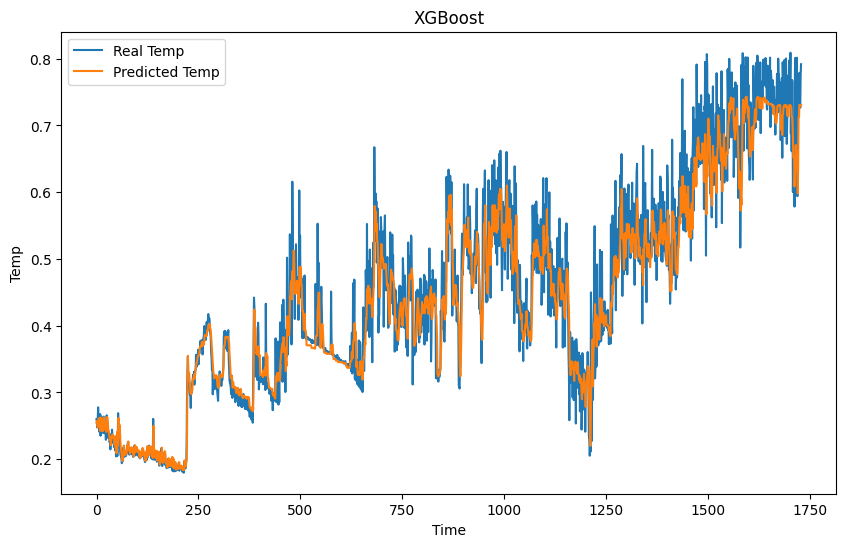

Best hyperparameters:  {'C': 10, 'epsilon': 0.01, 'kernel': 'linear'}


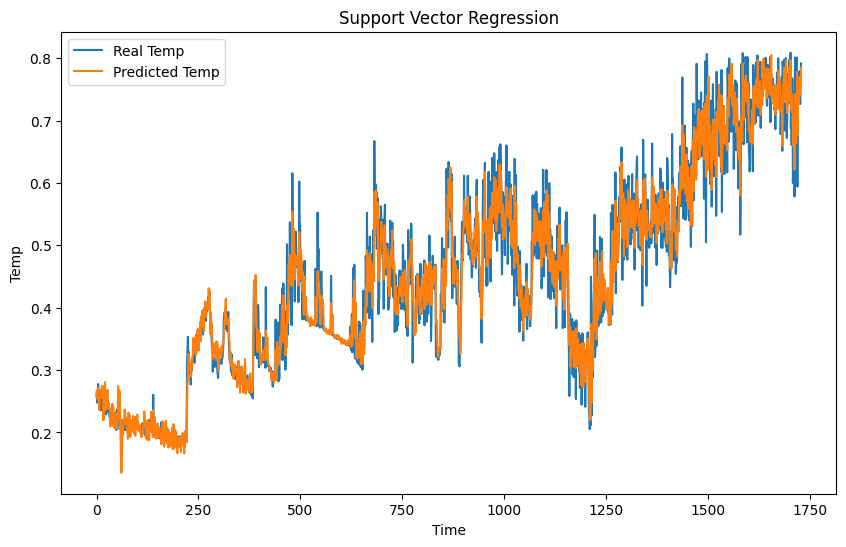

Best parameters:  {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
  Metric  Training   Testing
0   RMSE       0.0  0.148643
1    R^2       1.0  0.146286
2    MSE       0.0  0.148643
3    MAE       0.0  0.100953


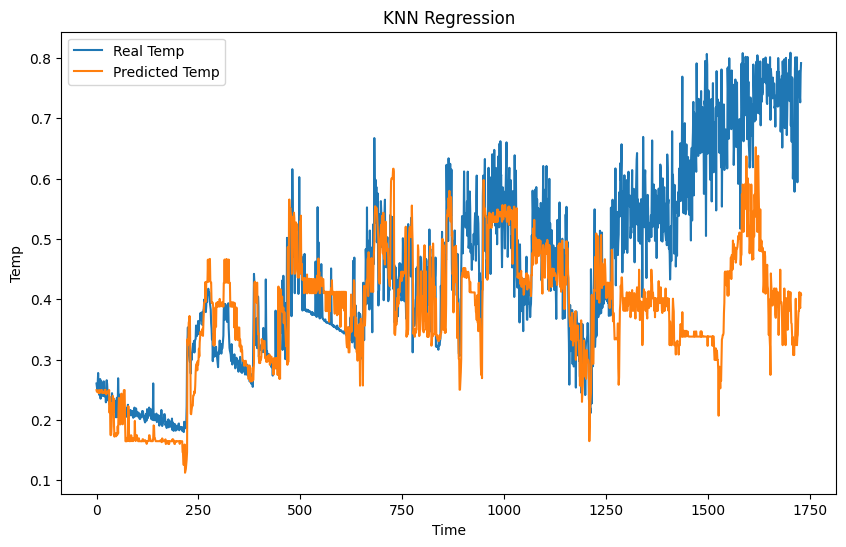

Epoch 1/100
219/219 [==============================] - 4s 3ms/step - loss: 0.0157
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0028
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0024
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0021
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0019
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0017
Epoch 7/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0017
Epoch 8/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0016
Epoch 9/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0014
Epoch 10/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0014
Epoch 11/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0013
Epoch 12/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0013
Epoch 13/100


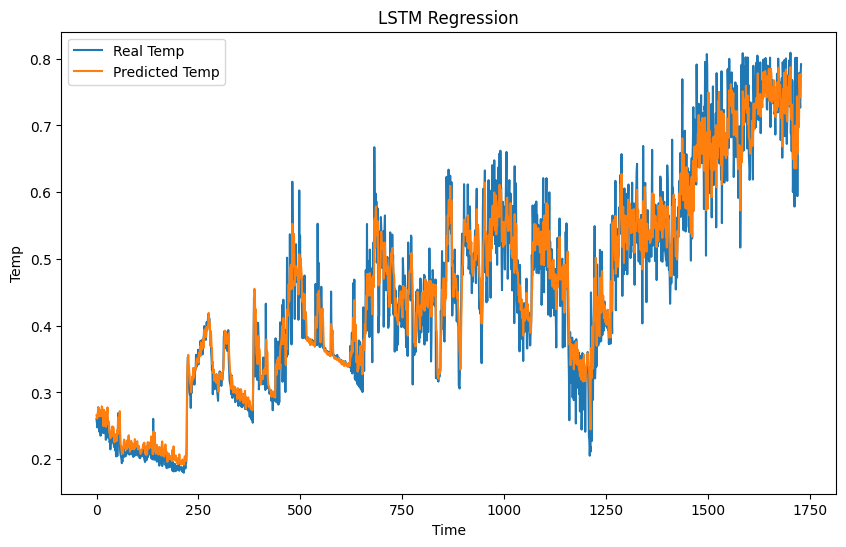

Iteration 1, loss = 0.00288161
Validation score: 0.982985
Iteration 2, loss = 0.00050529
Validation score: 0.985719
Iteration 3, loss = 0.00047236
Validation score: 0.984798
Iteration 4, loss = 0.00042876
Validation score: 0.986902
Iteration 5, loss = 0.00043570
Validation score: 0.987290
Iteration 6, loss = 0.00040651
Validation score: 0.987154
Iteration 7, loss = 0.00043412
Validation score: 0.986229
Iteration 8, loss = 0.00037597
Validation score: 0.990288
Iteration 9, loss = 0.00035759
Validation score: 0.990215
Iteration 10, loss = 0.00039247
Validation score: 0.987257
Iteration 11, loss = 0.00037566
Validation score: 0.989809
Iteration 12, loss = 0.00035348
Validation score: 0.987721
Iteration 13, loss = 0.00035806
Validation score: 0.988668
Iteration 14, loss = 0.00034113
Validation score: 0.990474
Iteration 15, loss = 0.00034562
Validation score: 0.989625
Iteration 16, loss = 0.00033233
Validation score: 0.991303
Iteration 17, loss = 0.00031681
Validation score: 0.990706
Iterat

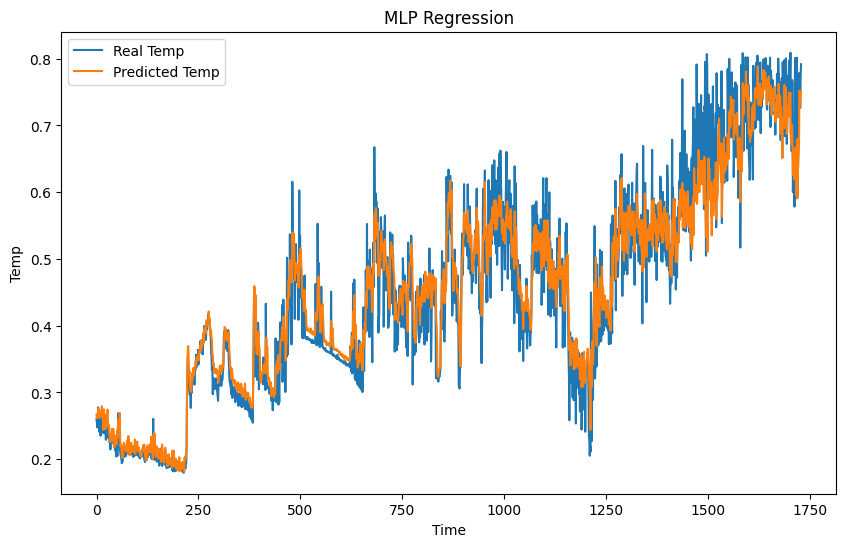

Best parameters:  {'alpha': 0.001}
  Metric  Training   Testing
0   RMSE  0.010725  0.012017
1    R^2  0.996353  0.991812
2    MSE  0.000115  0.000144
3    MAE  0.005961  0.008200


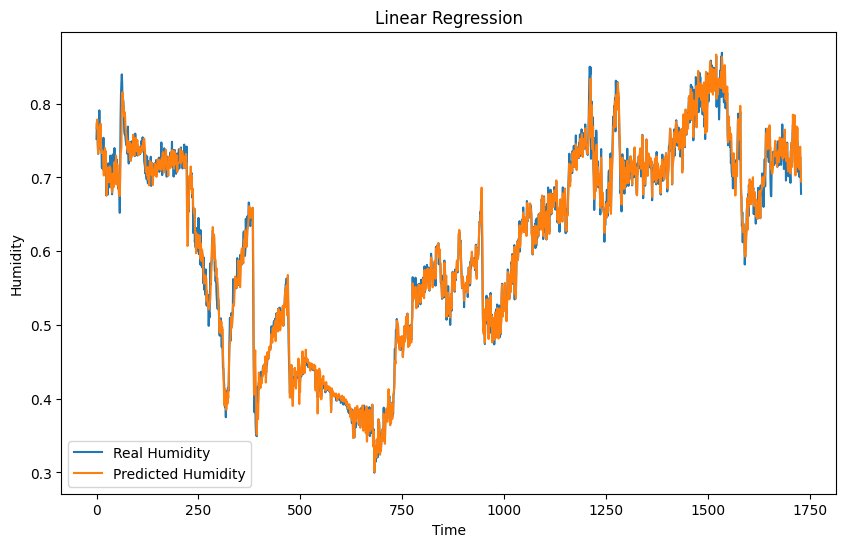

Fitting 5 folds for each of 135 candidates, totalling 675 fits
Best parameters:  {'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
  Metric  Training   Testing
0   RMSE  0.009175  0.025087
1    R^2  0.997330  0.964313
2    MSE  0.000084  0.000629
3    MAE  0.004214  0.017232


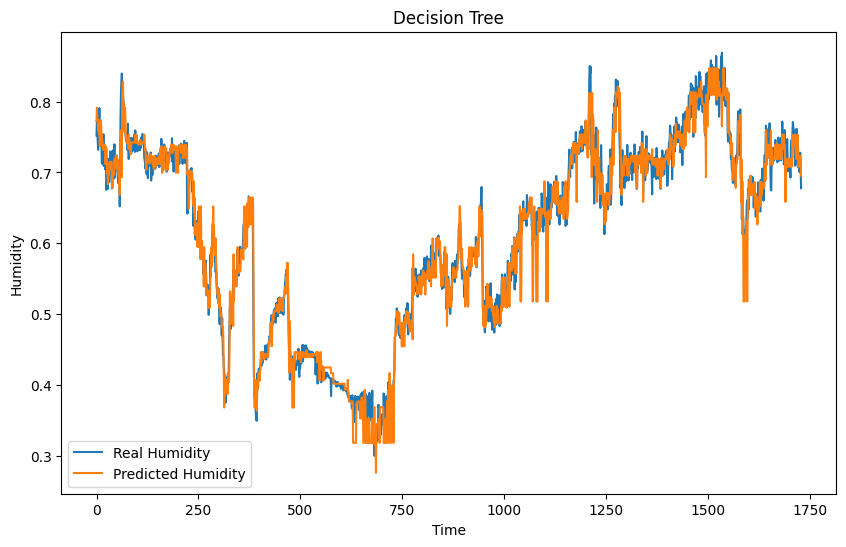

Fitting 5 folds for each of 135 candidates, totalling 675 fits
Best parameters:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
  Metric  Training   Testing
0   RMSE  0.007358  0.017690
1    R^2  0.998283  0.982256
2    MSE  0.000054  0.000313
3    MAE  0.003295  0.012717


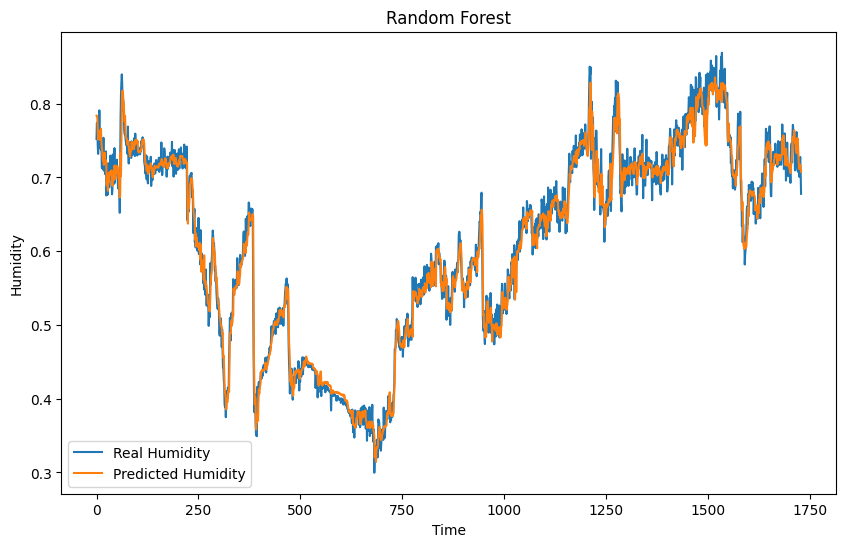

Best parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000, 'reg_alpha': 0.1}
  Metric  Training   Testing
0   RMSE  0.005528  0.017162
1    R^2  0.999031  0.983299
2    MSE  0.000031  0.000295
3    MAE  0.003871  0.011822


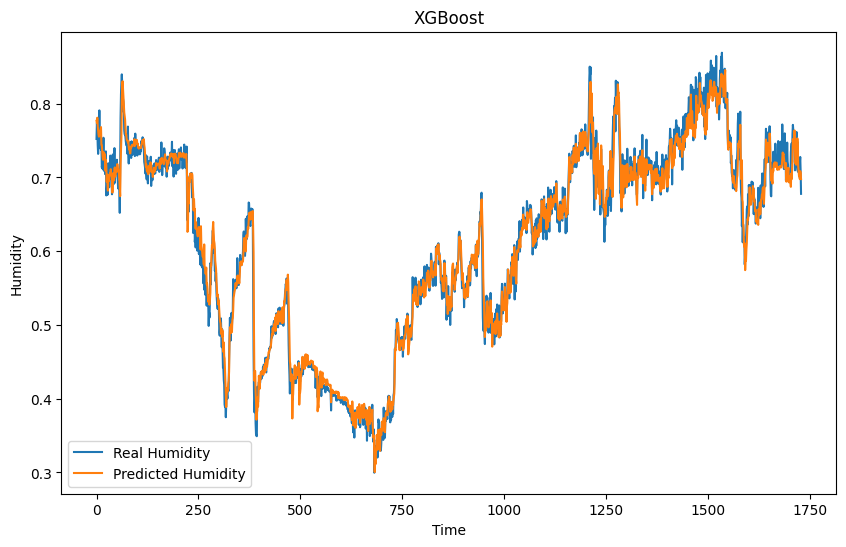

Best hyperparameters:  {'C': 10, 'epsilon': 0.01, 'kernel': 'linear'}


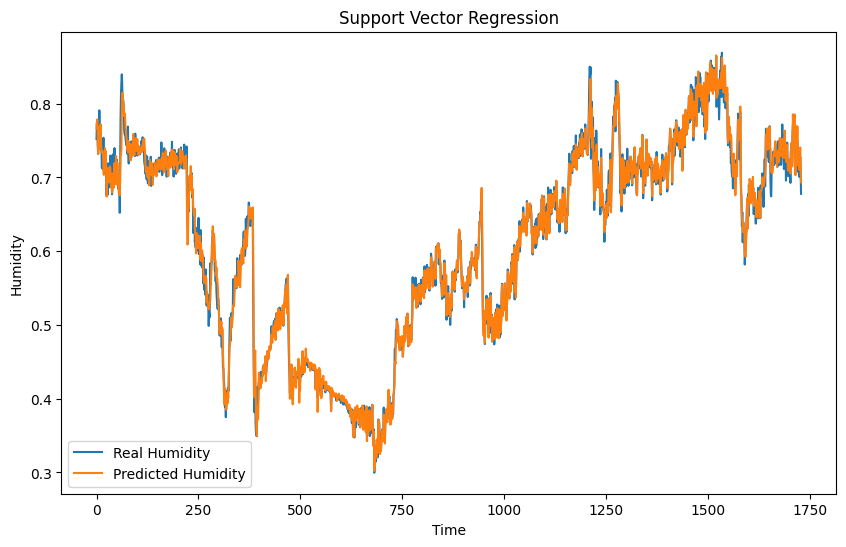

Best parameters:  {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
  Metric      Training   Testing
0   RMSE  8.568971e-09  0.130401
1    R^2  1.000000e+00  0.035823
2    MSE  7.342726e-17  0.130401
3    MAE  2.963236e-09  0.097675


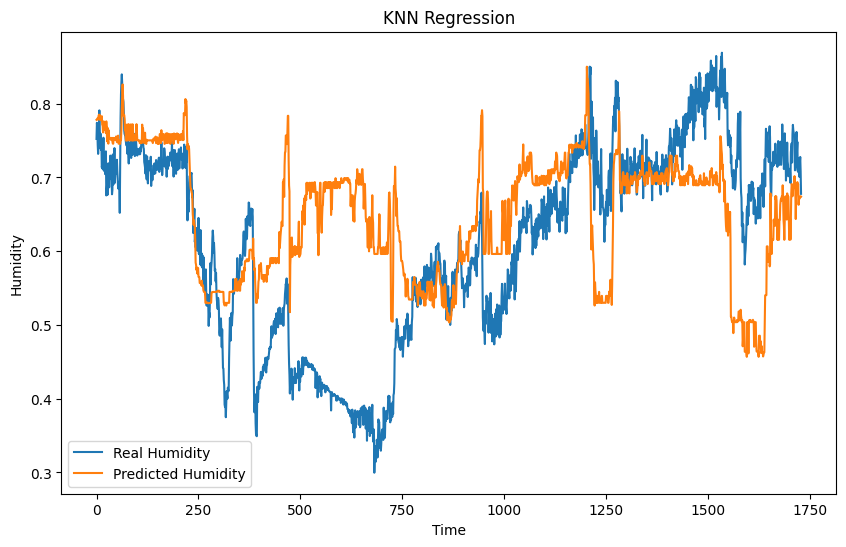

Epoch 1/100
219/219 [==============================] - 4s 3ms/step - loss: 0.0313
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0037
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0031
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0027
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0024
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0023
Epoch 7/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0020
Epoch 8/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0019
Epoch 9/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0018
Epoch 10/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0017
Epoch 11/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0016
Epoch 12/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0016
Epoch 13/100


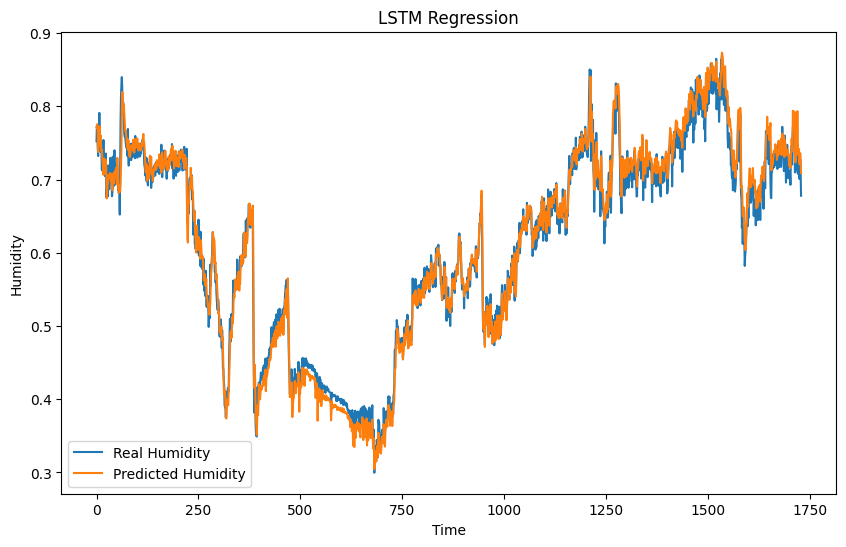

Iteration 1, loss = 0.00791821
Validation score: 0.988043
Iteration 2, loss = 0.00031600
Validation score: 0.990505
Iteration 3, loss = 0.00027889
Validation score: 0.991137
Iteration 4, loss = 0.00026199
Validation score: 0.992237
Iteration 5, loss = 0.00026114
Validation score: 0.992299
Iteration 6, loss = 0.00024964
Validation score: 0.988884
Iteration 7, loss = 0.00024568
Validation score: 0.992501
Iteration 8, loss = 0.00023971
Validation score: 0.992174
Iteration 9, loss = 0.00024153
Validation score: 0.990935
Iteration 10, loss = 0.00023236
Validation score: 0.991739
Iteration 11, loss = 0.00024186
Validation score: 0.989955
Iteration 12, loss = 0.00024440
Validation score: 0.993753
Iteration 13, loss = 0.00022829
Validation score: 0.992616
Iteration 14, loss = 0.00022578
Validation score: 0.993278
Iteration 15, loss = 0.00021800
Validation score: 0.993921
Iteration 16, loss = 0.00023613
Validation score: 0.993582
Iteration 17, loss = 0.00021884
Validation score: 0.991614
Iterat

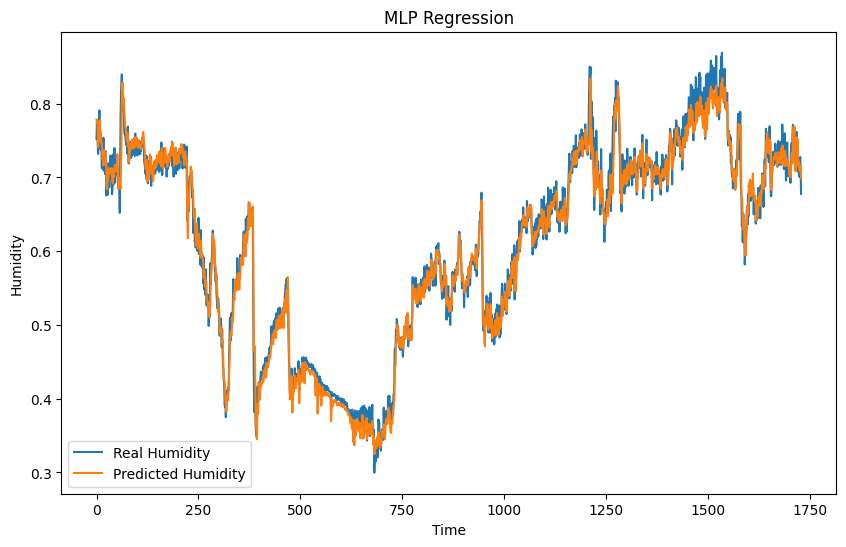

Best parameters:  {'alpha': 0.01}
  Metric  Training   Testing
0   RMSE  0.020979  0.026032
1    R^2  0.995137  0.993251
2    MSE  0.000440  0.000678
3    MAE  0.012377  0.015000


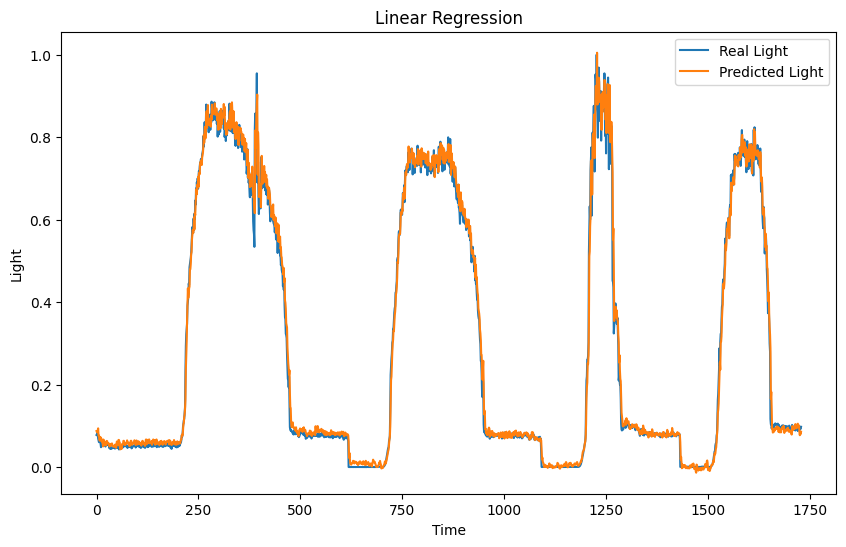

Fitting 5 folds for each of 135 candidates, totalling 675 fits
Best parameters:  {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
  Metric  Training   Testing
0   RMSE  0.022095  0.025963
1    R^2  0.994606  0.993287
2    MSE  0.000488  0.000674
3    MAE  0.013114  0.014105


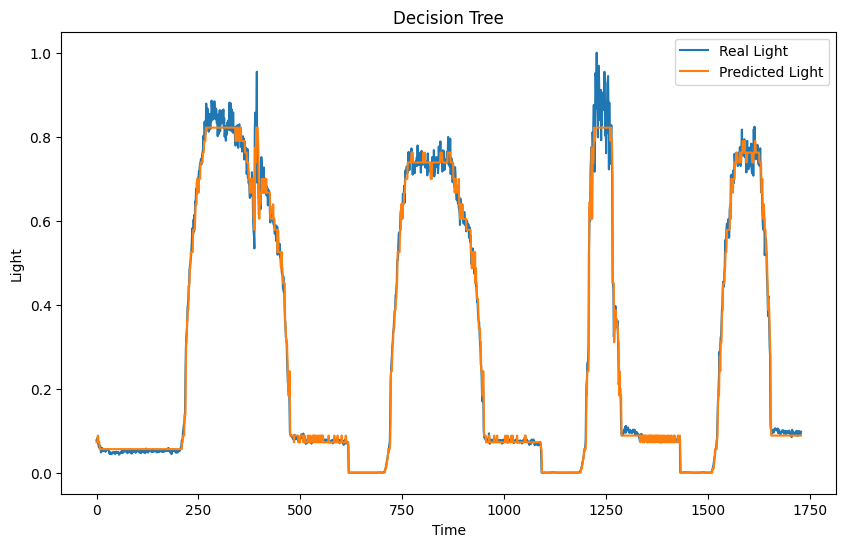

Fitting 5 folds for each of 135 candidates, totalling 675 fits
Best parameters:  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 500}
  Metric  Training   Testing
0   RMSE  0.012950  0.023775
1    R^2  0.998147  0.994371
2    MSE  0.000168  0.000565
3    MAE  0.006184  0.011471


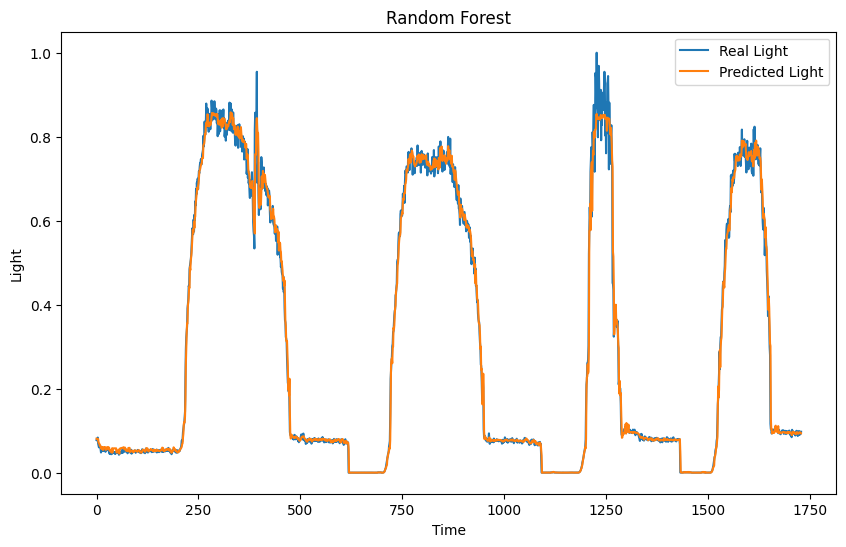

Best parameters:  {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 1000, 'reg_alpha': 1}
  Metric  Training   Testing
0   RMSE  0.020481  0.026005
1    R^2  0.995365  0.993265
2    MSE  0.000419  0.000676
3    MAE  0.011363  0.012809


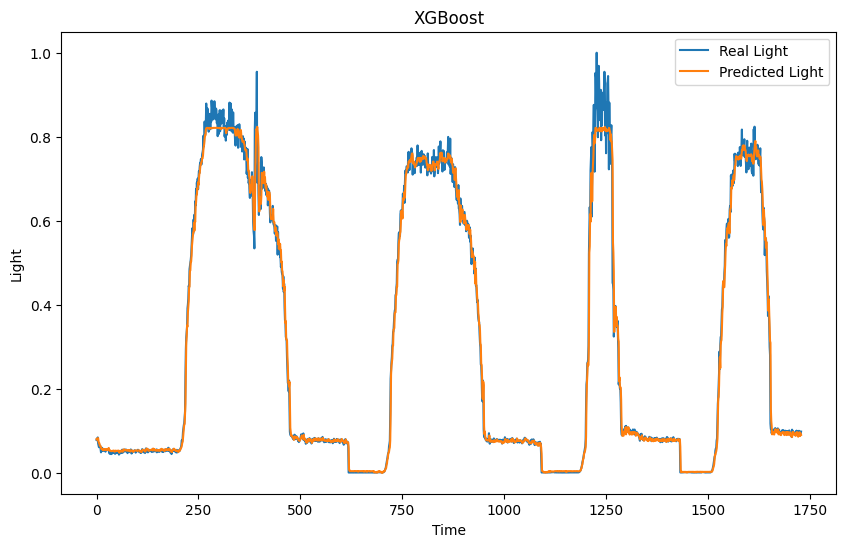

Best hyperparameters:  {'C': 10, 'epsilon': 0.01, 'kernel': 'linear'}


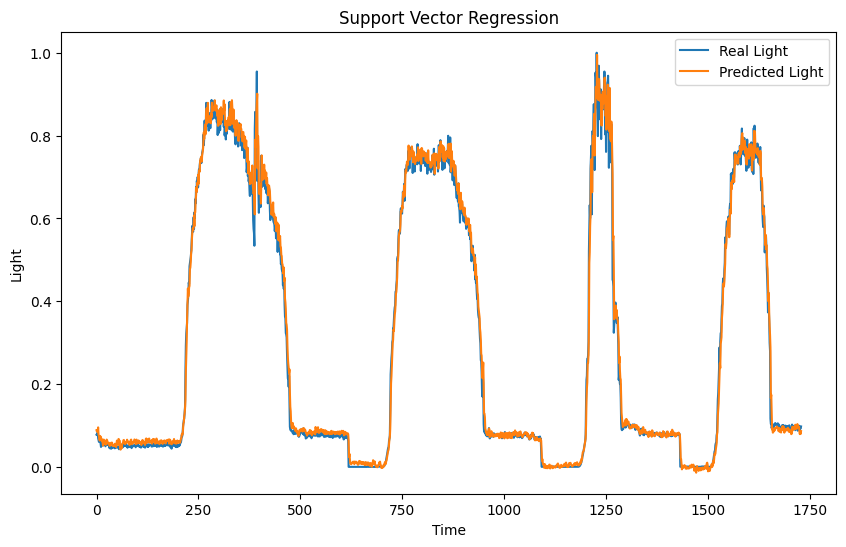

Best parameters:  {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
  Metric  Training   Testing
0   RMSE  0.020133  0.060541
1    R^2  0.995521  0.963497
2    MSE  0.000405  0.060541
3    MAE  0.010587  0.046249


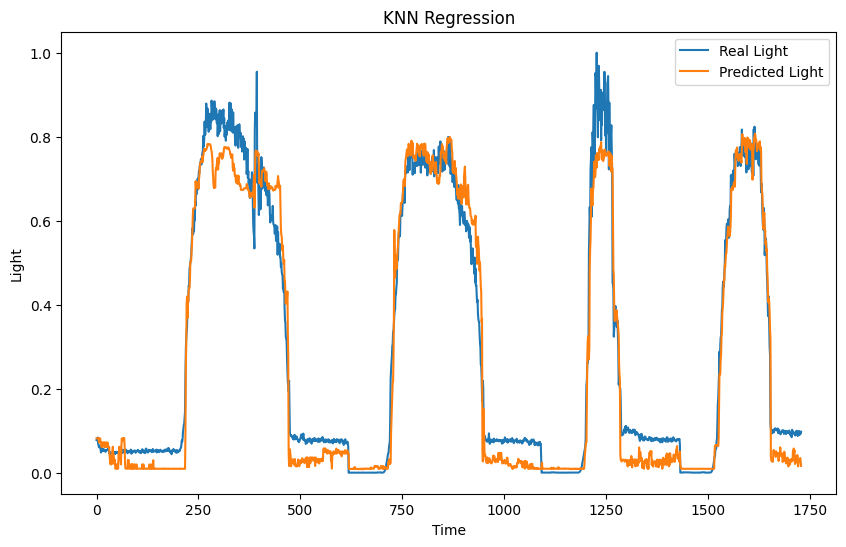

Epoch 1/100
219/219 [==============================] - 3s 3ms/step - loss: 0.0246
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0033
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0029
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0025
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0023
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0023
Epoch 7/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0020
Epoch 8/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0021
Epoch 9/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0020
Epoch 10/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0019
Epoch 11/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0018
Epoch 12/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0018
Epoch 13/100


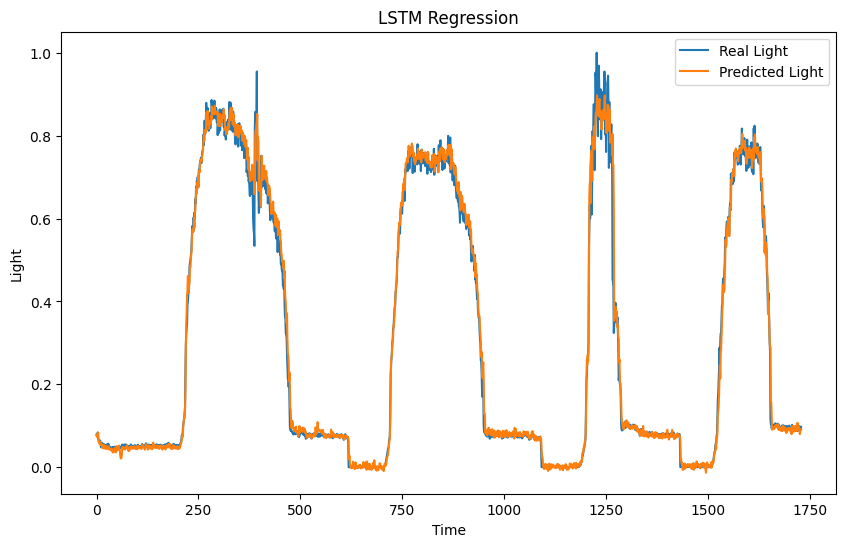

Iteration 1, loss = 0.00459866
Validation score: 0.991204
Iteration 2, loss = 0.00053449
Validation score: 0.991901
Iteration 3, loss = 0.00049864
Validation score: 0.991071
Iteration 4, loss = 0.00052249
Validation score: 0.993118
Iteration 5, loss = 0.00046008
Validation score: 0.990343
Iteration 6, loss = 0.00048190
Validation score: 0.992387
Iteration 7, loss = 0.00047668
Validation score: 0.992921
Iteration 8, loss = 0.00045455
Validation score: 0.991341
Iteration 9, loss = 0.00048265
Validation score: 0.993715
Iteration 10, loss = 0.00047688
Validation score: 0.993946
Iteration 11, loss = 0.00042221
Validation score: 0.993398
Iteration 12, loss = 0.00047418
Validation score: 0.993424
Iteration 13, loss = 0.00041876
Validation score: 0.990537
Iteration 14, loss = 0.00042797
Validation score: 0.994046
Iteration 15, loss = 0.00042732
Validation score: 0.993984
Iteration 16, loss = 0.00039395
Validation score: 0.993309
Iteration 17, loss = 0.00040292
Validation score: 0.993100
Iterat

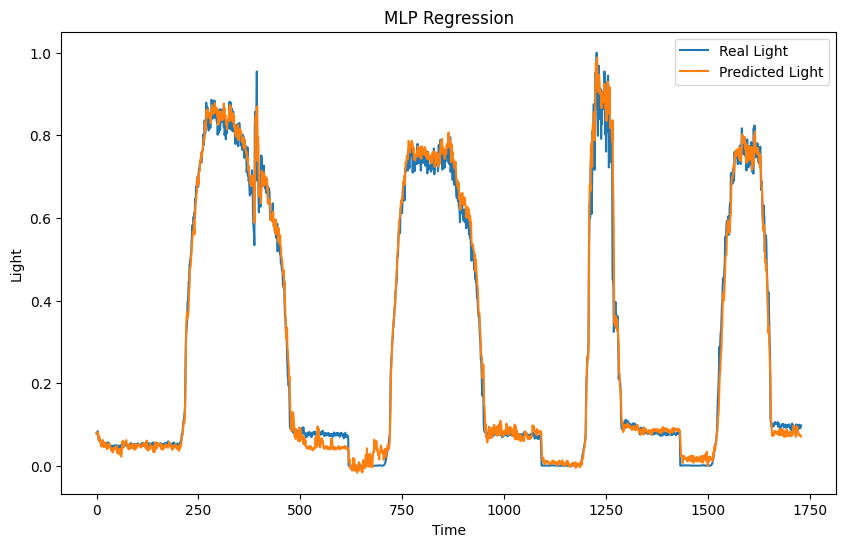

Best parameters:  {'alpha': 0.01}
  Metric  Training   Testing
0   RMSE  0.006254  0.008803
1    R^2  0.998611  0.991494
2    MSE  0.000039  0.000077
3    MAE  0.004529  0.006571


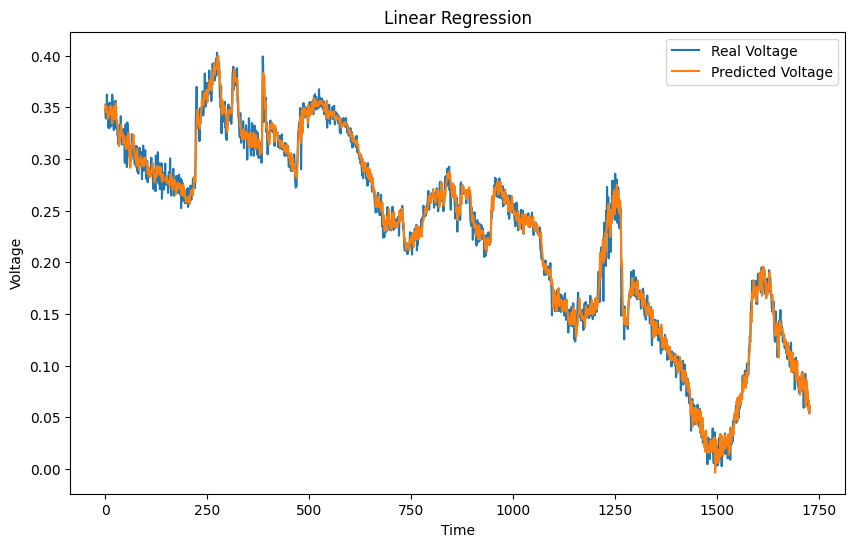

Fitting 5 folds for each of 135 candidates, totalling 675 fits
Best parameters:  {'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
  Metric  Training   Testing
0   RMSE  0.003516  0.112845
1    R^2  0.999561 -0.397635
2    MSE  0.000012  0.012734
3    MAE  0.002348  0.078097


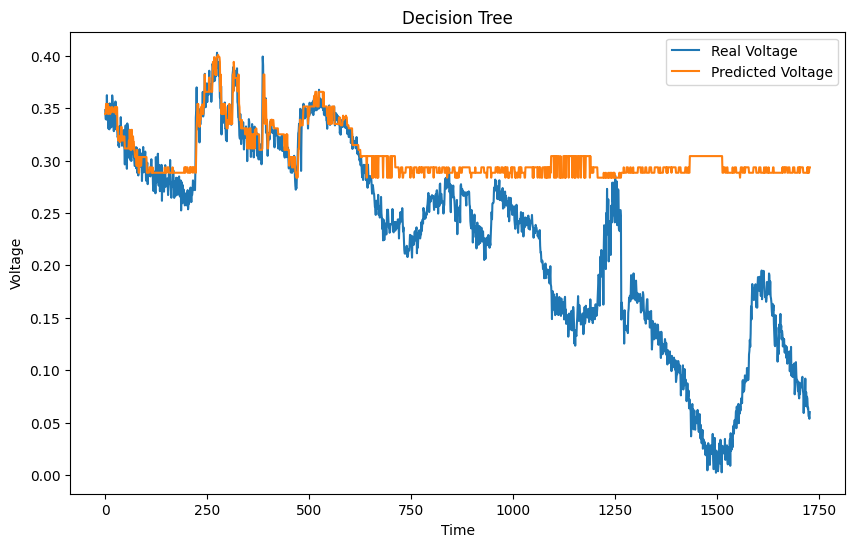

Fitting 5 folds for each of 135 candidates, totalling 675 fits
Best parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
  Metric  Training   Testing
0   RMSE  0.003068  0.116828
1    R^2  0.999665 -0.498055
2    MSE  0.000009  0.013649
3    MAE  0.002115  0.083402


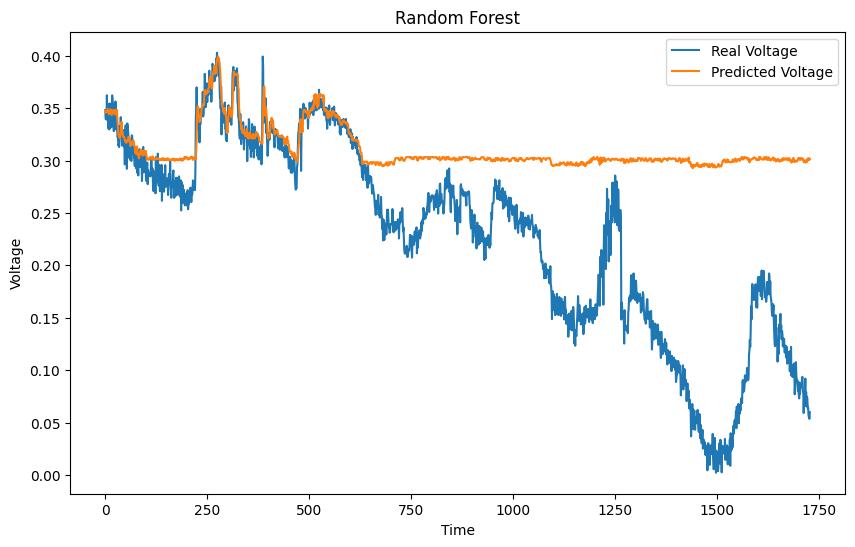

Best parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000, 'reg_alpha': 0}
  Metric  Training   Testing
0   RMSE  0.001713  0.119192
1    R^2  0.999896 -0.559287
2    MSE  0.000003  0.014207
3    MAE  0.001281  0.085700


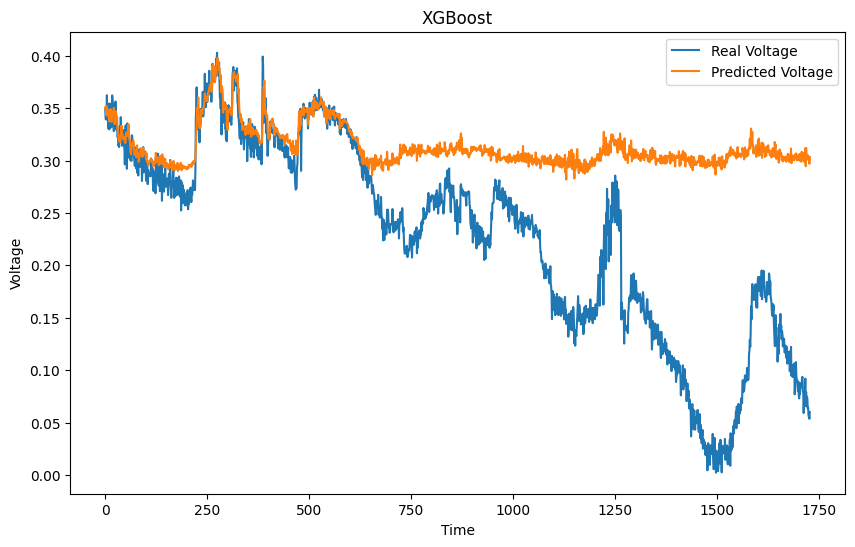

Best hyperparameters:  {'C': 10, 'epsilon': 0.01, 'kernel': 'linear'}


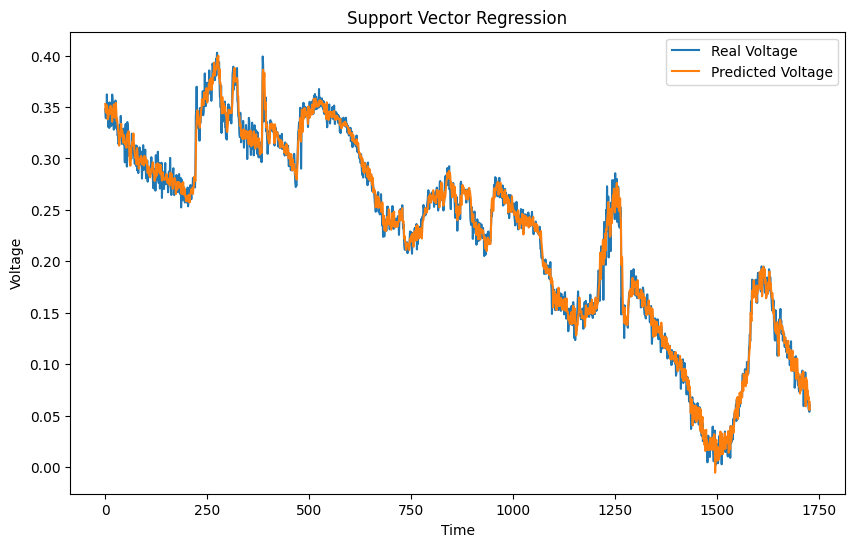

Best parameters:  {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
  Metric      Training   Testing
0   RMSE  1.612233e-08  0.185579
1    R^2  1.000000e+00 -2.779959
2    MSE  2.599297e-16  0.185579
3    MAE  5.348613e-09  0.159323


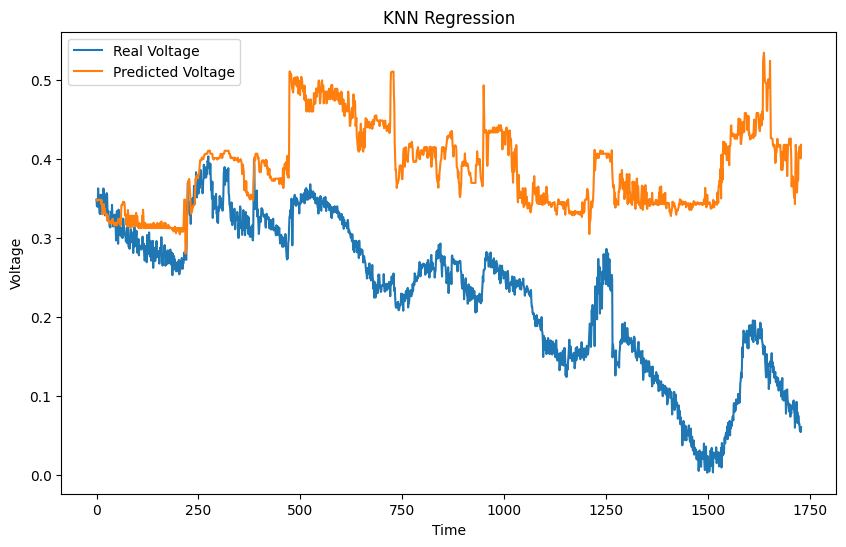

Epoch 1/100
219/219 [==============================] - 3s 3ms/step - loss: 0.0299
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0032
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0027
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0025
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0023
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0021
Epoch 7/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0019
Epoch 8/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0019
Epoch 9/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0018
Epoch 10/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0016
Epoch 11/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0015
Epoch 12/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0014
Epoch 13/100


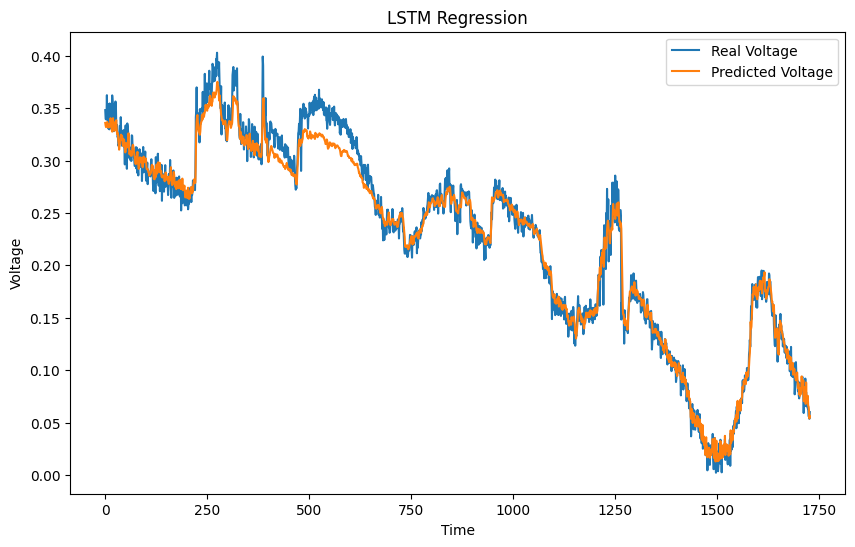

Iteration 1, loss = 0.00401555
Validation score: 0.995744
Iteration 2, loss = 0.00022506
Validation score: 0.996252
Iteration 3, loss = 0.00020472
Validation score: 0.995505
Iteration 4, loss = 0.00020400
Validation score: 0.997602
Iteration 5, loss = 0.00018560
Validation score: 0.997128
Iteration 6, loss = 0.00018752
Validation score: 0.997800
Iteration 7, loss = 0.00017262
Validation score: 0.996371
Iteration 8, loss = 0.00017330
Validation score: 0.997983
Iteration 9, loss = 0.00017199
Validation score: 0.998036
Iteration 10, loss = 0.00016369
Validation score: 0.998058
Iteration 11, loss = 0.00016088
Validation score: 0.997837
Iteration 12, loss = 0.00016648
Validation score: 0.997623
Iteration 13, loss = 0.00016123
Validation score: 0.997678
Iteration 14, loss = 0.00017195
Validation score: 0.997767
Iteration 15, loss = 0.00015543
Validation score: 0.998166
Iteration 16, loss = 0.00014892
Validation score: 0.997505
Iteration 17, loss = 0.00015129
Validation score: 0.997888
Iterat

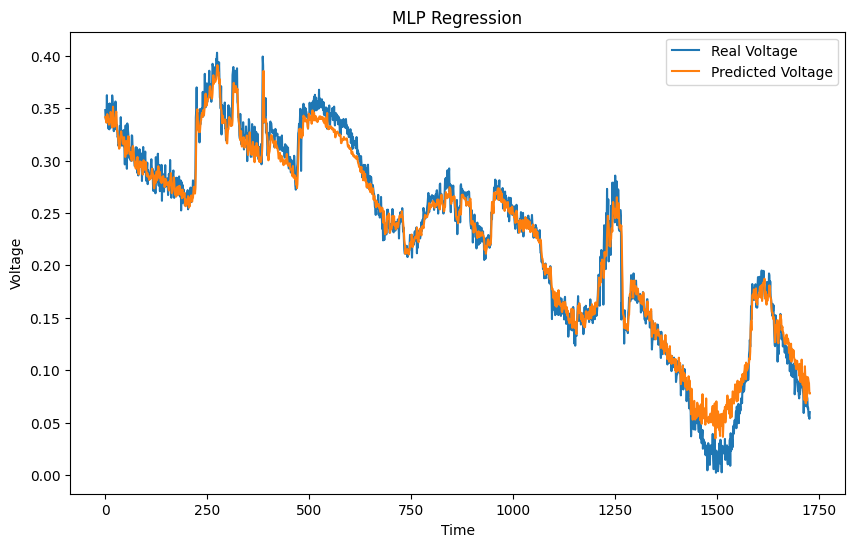

In [56]:
import json

# Define models to train
ml_models = {
    'Linear_Regression': linear_regression,
    'Decision_Tree': decision_tree,
    'Random_Forest': random_forest,
    'XGBoost': xg_boost,
    'SVR': svr_model,
    'KNN': knn_model,
    'LSTM': lstm_model,
    'MLP': mlp_model
}

# Define target variables
targets = ['temp', 'humidity', 'light', 'voltage']

# Initialize results dictionary
performance_metrics = {}

# Train and evaluate models for each target variable
for target in targets:
    target_performance_metrics = {}
    for model_name, model_func in ml_models.items():
        # Train model and get evaluation metrics
        # train_test_data and parameter are undefined, so this code is incomplete
        model_data = train_test_data(data, target)
        X_train, y_train, X_test, y_test, parameter = model_data
        train_rmse, train_r2, train_mse, train_mae, test_rmse, test_r2, test_mse, test_mae = model_func(X_train, y_train, X_test, y_test, parameter)

        # Save results for this model and target
        target_performance_metrics[model_name] = {
            'train_rmse': train_rmse,
            'train_r2': train_r2,
            'train_mse': train_mse,
            'train_mae': train_mae,
            'test_rmse': test_rmse,
            'test_r2': test_r2,
            'test_mse': test_mse,
            'test_mae': test_mae
        }
    # Save results for this target
    performance_metrics[target] = target_performance_metrics

# Save results as JSON
with open('performance_metrics.json', 'w') as f:
    json.dump(performance_metrics, f)


C:\Users\pares\AppData\Local\Temp\ipykernel_13016\2462922549.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_models = top_models.append({
C:\Users\pares\AppData\Local\Temp\ipykernel_13016\2462922549.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  worst_models = worst_models.append({
C:\Users\pares\AppData\Local\Temp\ipykernel_13016\2462922549.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_models = top_models.append({
C:\Users\pares\AppData\Local\Temp\ipykernel_13016\2462922549.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  worst_models = worst_models.append({
C:\Users\pares\AppData\Local\Temp\ipykernel_1301

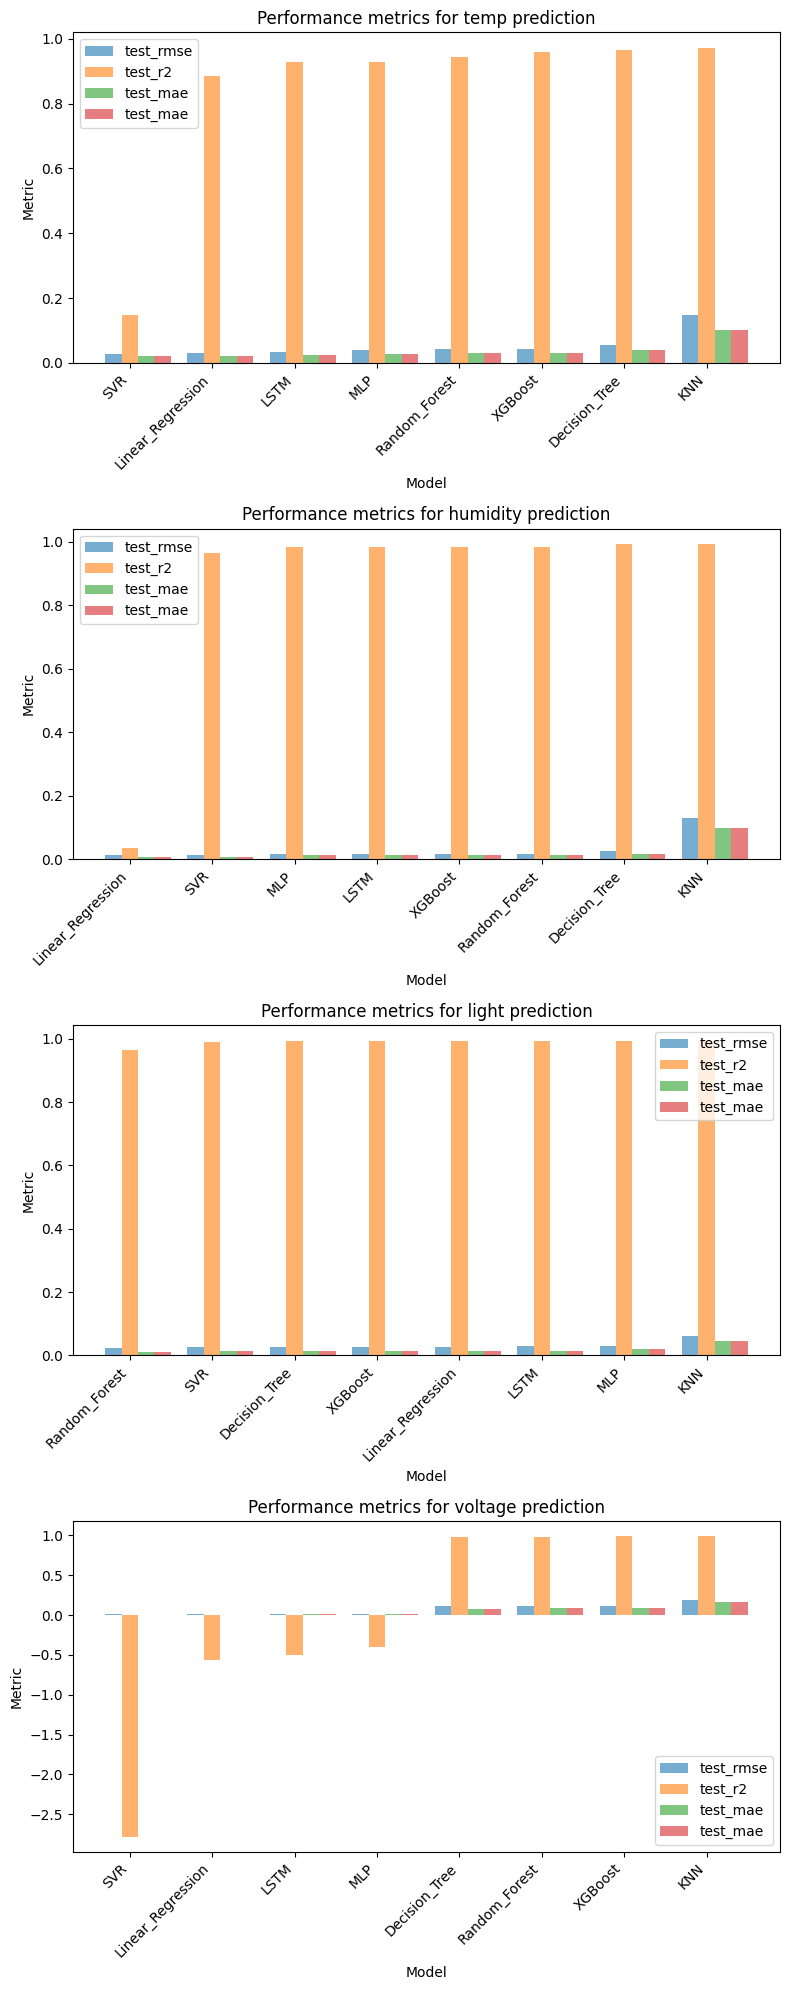

Top 3 models for temp test_rmse:
  Target     Metric              Model     Value
0   temp  test_rmse                SVR  0.027191
1   temp  test_rmse  Linear_Regression  0.029920
2   temp  test_rmse               LSTM  0.032395
Worst model for temp test_rmse:
  Target     Metric Model     Value
2   temp  test_rmse   KNN  0.148643
Top 3 models for temp test_r2:
  Target   Metric          Model     Value
3   temp  test_r2            KNN  0.146286
4   temp  test_r2  Decision_Tree  0.883808
5   temp  test_r2        XGBoost  0.928037
Worst model for temp test_r2:
  Target   Metric Model     Value
5   temp  test_r2   SVR  0.971433
Top 3 models for temp test_mae:
  Target    Metric              Model     Value
6   temp  test_mae                SVR  0.020259
7   temp  test_mae  Linear_Regression  0.021705
8   temp  test_mae               LSTM  0.023837
Worst model for temp test_mae:
   Target    Metric Model     Value
11   temp  test_mae   KNN  0.100953
Top 3 models for temp test_mae:
  Targe

In [57]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Define targets and metrics of interest
targets = ['temp', 'humidity', 'light', 'voltage']
metrics = ['test_rmse', 'test_r2', 'test_mae', 'test_mae']

# Load performance metrics from JSON file
with open('performance_metrics.json', 'r') as f:
    performance_metrics = json.load(f)

# Initialize result tables
top_models = pd.DataFrame(columns=['Target', 'Metric', 'Model', 'Value'])
worst_models = pd.DataFrame(columns=['Target', 'Metric', 'Model', 'Value'])

# Create subplots for each target
fig, axes = plt.subplots(nrows=len(targets), ncols=1, figsize=(8, 20))

# Define width of each bar
bar_width = 0.2

# Define x-offset for each metric
offsets = np.arange(-bar_width, bar_width * (len(metrics) - 1) + 0.001, bar_width)

# Iterate over targets
for i, target in enumerate(targets):
    # Get performance metrics for all models
    model_metrics = performance_metrics[target]

    # Sort models based on each metric
    sorted_models = {metric: sorted(model_metrics.items(), key=lambda x: x[1][metric]) for metric in metrics}

    # Add top models and worst model to respective result tables
    for metric in metrics:
        for j in range(3):
            top_models = top_models.append({
                'Target': target,
                'Metric': metric,
                'Model': sorted_models[metric][j][0],
                'Value': sorted_models[metric][j][1][metric]
            }, ignore_index=True)

            worst_models = worst_models.append({
                'Target': target,
                'Metric': metric,
                'Model': sorted_models[metric][-1][0],
                'Value': sorted_models[metric][-1][1][metric]
            }, ignore_index=True)

    # Get names of all models
    model_names = [x[0] for x in sorted_models['test_rmse']]

    sns.color_palette('Set2', len(metrics))

    # Create a bar plot with four subplots for the current target
    ax = axes[i]

    for j, metric in enumerate(metrics):
        ax.bar(np.arange(len(model_names)) + offsets[j], [x[1][metric] for x in sorted_models[metric]],
               width=bar_width, alpha=0.6, label=metric)

    ax.set_title(f'Performance metrics for {target} prediction')
    ax.set_xlabel('Model')
    ax.set_ylabel('Metric')
    ax.set_xticks(np.arange(len(model_names)))
    ax.set_xticklabels(model_names, rotation=45, ha='right')
    ax.legend()

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

# Print top and worst models for each target and metric
for target in targets:
    for metric in metrics:
        print(f'Top 3 models for {target} {metric}:')
        top_models_subset = top_models[(top_models['Target'] == target) & (top_models['Metric'] == metric)]
        print(top_models_subset.head(3))
        print(f'Worst model for {target} {metric}:')
        worst_models_subset = worst_models[(worst_models['Target'] == target) & (worst_models['Metric'] == metric)]
        print(worst_models_subset.tail(1))


In [60]:
target=['temp', 'humidity', 'light', 'voltage']

Best parameters:  {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
  Metric  Training   Testing
0   RMSE       0.0  0.148643
1    R^2       1.0  0.146286
2    MSE       0.0  0.022095
3    MAE       0.0  0.100953


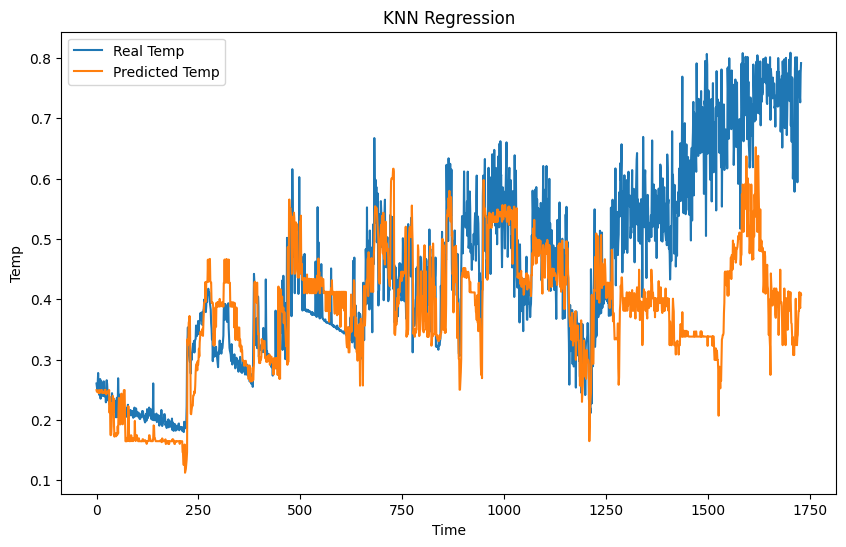

Best parameters:  {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
  Metric      Training   Testing
0   RMSE  8.568971e-09  0.130401
1    R^2  1.000000e+00  0.035823
2    MSE  7.342726e-17  0.017004
3    MAE  2.963236e-09  0.097675


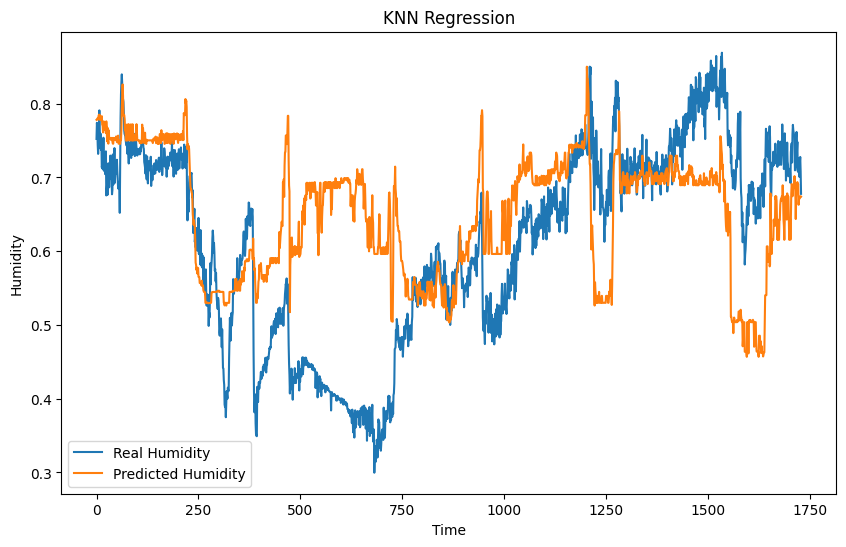

Best parameters:  {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
  Metric  Training   Testing
0   RMSE  0.020133  0.060541
1    R^2  0.995521  0.963497
2    MSE  0.000405  0.003665
3    MAE  0.010587  0.046249


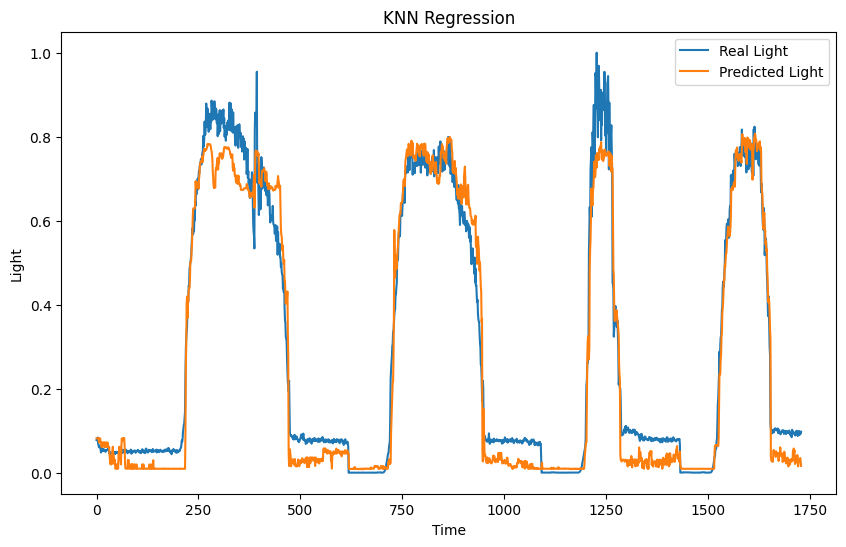

Best parameters:  {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
  Metric      Training   Testing
0   RMSE  1.612233e-08  0.185579
1    R^2  1.000000e+00 -2.779959
2    MSE  2.599297e-16  0.034439
3    MAE  5.348613e-09  0.159323


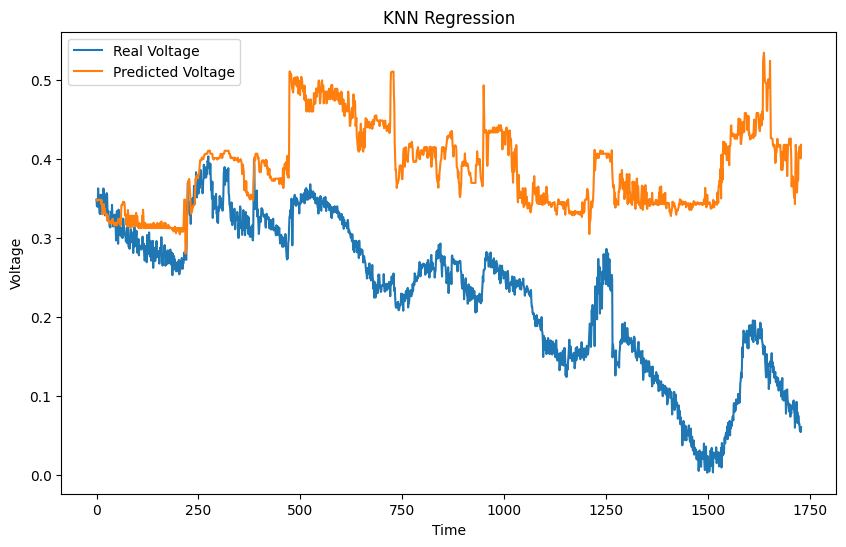

In [63]:
for i in target:
    model_data= train_test_data(data, i)
    X_train, y_train, X_test, y_test, parameter= model_data

    x= knn_model(X_train, y_train, X_test, y_test, parameter)